In [2]:
%matplotlib inline
import itertools
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import skimage
from skimage import io, transform
from pylab import rcParams
rcParams['figure.figsize'] = 10, 7

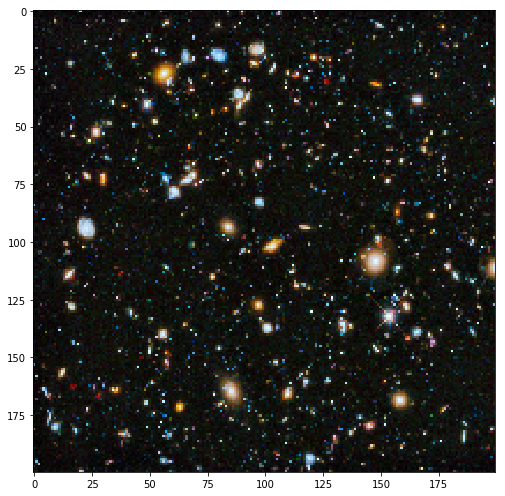

In [16]:
train_size = 200
test_size = 1024
image_path = 'Hubble.jpg'
image = transform.resize(io.imread(image_path), (train_size, train_size))
image = image if len(image.shape) < 3 or image.shape[2] == 3 else image[:,:,:3]
io.imshow(image)
X = tf.placeholder('float32', (None, 2))

In [23]:
reshaped_image = np.array(image.reshape(train_size ** 2, -1))
reshaped_image[1

0.0083333333333302749

In [12]:
def model(X, w):
    h1 = tf.nn.tanh(tf.matmul(X, w['h1']))
    h2 = tf.nn.tanh(tf.matmul(h1, w['h2']))
    h3 = tf.nn.tanh(tf.matmul(h2, w['h3']))
    h4 = tf.nn.tanh(tf.matmul(h3, w['h4']))
    h5 = tf.nn.tanh(tf.matmul(h4, w['h4']))
    h6 = tf.nn.tanh(tf.matmul(h5, w['h4']))
    h7 = tf.nn.tanh(tf.matmul(h6, w['h4']))
    h8 = tf.nn.tanh(tf.matmul(h7, w['h4']))    
    return tf.nn.sigmoid(tf.matmul(h8, w['out']))

def init_weights(shape):
    return tf.Variable(tf.truncated_normal(shape, stddev=0.1))

Y = tf.placeholder("float32", (None, None))

w = {
  'h1': init_weights([2, 20]),
  'h2': init_weights([20, 20]),
  'h3': init_weights([20, 20]),
  'h4': init_weights([20, 20]),
  'h5': init_weights([20, 20]),
  'h6': init_weights([20, 20]),
  'h7': init_weights([20, 20]),
  'h8': init_weights([20, 20]),
  'out': init_weights([20, 3]),
}

out = model(X, w)

cost = tf.reduce_mean(tf.squared_difference(out, Y))
train_op = tf.train.AdamOptimizer().minimize(cost)


In [13]:
n_epochs = 10000

generate_coord = lambda size: (np.array(list(itertools.product(np.linspace(0,1,size),np.linspace(0,1,size)))).reshape(size ** 2, 2))

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    x = generate_coord(train_size)
    reshaped_image = np.array(image.reshape(train_size ** 2, -1))
    for epoch in range(int(n_epochs + 1)):
        _, c = sess.run([train_op, cost], feed_dict={X: x, Y: reshaped_image})
        if epoch % (n_epochs/10) == 0:
            print('{:0.0%} \t Loss: {}'.format(epoch/n_epochs, c).expandtabs(7))
    new_image = sess.run(out, feed_dict={X: generate_coord(test_size)})

0%      Loss: 0.17782366275787354
10%     Loss: 0.019287720322608948
20%     Loss: 0.019230585545301437
30%     Loss: 0.019168561324477196
40%     Loss: 0.01914762333035469
50%     Loss: 0.01910076104104519
60%     Loss: 0.019025271758437157
70%     Loss: 0.018952542915940285
80%     Loss: 0.018898775801062584
90%     Loss: 0.018860774114727974
100%    Loss: 0.018811563029885292


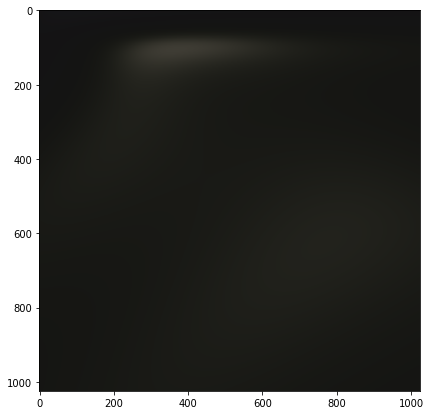

In [14]:
plt.imshow(new_image.reshape(test_size, test_size, -1)) # 100000 epochs

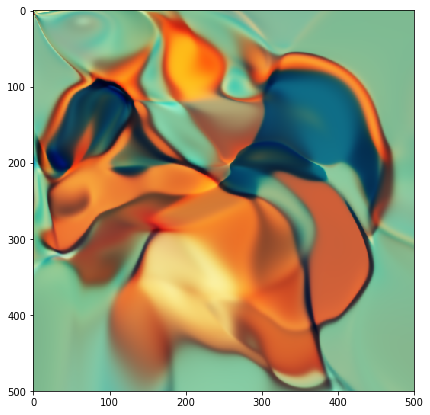

In [31]:
plt.imshow(new_image.reshape(test_size, test_size, -1)) # 100000 epochs